# PGP Data Science Engineering
Exploratory Data Analysis – Mini Project:

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Data:
The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.

Data Preprocessing:
1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unecessary for analysis.
3.	The following columns need to be converted for further analysis:
3.	The following columns need to be converted for further analysis:

Column	Details	Required output
'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year
'Contract Valid Until'	Date as a string 	Convert to datetime type
'Height'	In inches with a quotation mark 	Convert to Float with decimal points
'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float
'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
(You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.)

4.	Check for missing values and do a mean imputation where necessary.

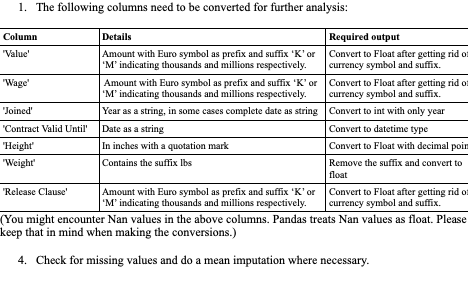

Exploratory Analysis:

1.	Plot the distribution of Overall rating for all players. 
2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?

4.	Generate tables containing the top 5 players by Overall rating for each unique position.
a)	Are there any players appearing in more than one Table. Please point out such players.
b)	What is the average wage one can expect to pay for the top 5 in every position?

Final Report:
Put all highlights from the information obtained above in a power point presentation containing a maximum of 5 slides. No title slide required.
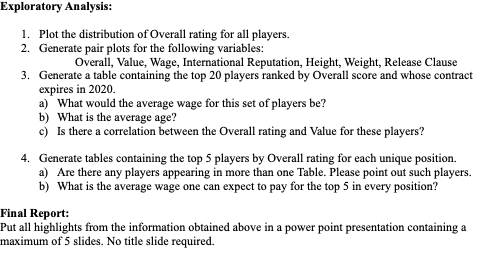

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('fifa.csv')
df1 = pd.read_csv('fifa_ variable_information.csv')

#### Dropping unnecessary columns. i.e all the columns containing urls.

In [167]:
print(df.isnull().sum()/len(df)*100)

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

In [95]:
df.drop(columns=['Flag','Club Logo','Photo','Loaned From'],inplace=True)
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


#### changing columns datatypes and removing suffix and prefix

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

#### Converting values datatype to float64

In [97]:
df['Value']=df['Value'].str.replace('€','').str.replace('M','000000').str.replace('K','000')
df['Value']=df['Value'].astype('float')
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


#### Converting datatype of Wage to float64

In [98]:
df['Wage']=df['Wage'].str.replace('€','').str.replace('M','000000').str.replace('K','000')
df['Wage']=df['Wage'].astype('float')
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


#### Converting Joined to datetime and fetch thing the year from there

In [99]:
df['Joined']=pd.to_datetime(df['Joined'])
df['Joined_Year']=df['Joined'].dt.year
df['Joined_Year'].head(2)

0    2004.0
1    2018.0
Name: Joined_Year, dtype: float64

#### Converting 'Contract Valid Until' to datetime

In [100]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])
df['Contract Valid Until']=df['Contract Valid Until'].dt.year
df['Contract Valid Until'].head(2)

0    2021.0
1    2022.0
Name: Contract Valid Until, dtype: float64

#### Converting Height to Float

In [101]:
df['Height']=df['Height'].str.replace("'",'.')
df['Height']=df['Height'].astype('float')
df['Height'].head(2)

0    5.7
1    6.2
Name: Height, dtype: float64

#### Coverting Weight to Float

In [102]:
df['Weight']=df['Weight'].str.replace('lbs','')
df['Weight']=df['Weight'].astype('float')
df['Weight'].head(2)

0    159.0
1    183.0
Name: Weight, dtype: float64

##### Converting prefix and suffix and converting the data type

In [103]:
df['Release Clause']=df['Release Clause'].str.replace('€','').str.replace('M','000000').str.replace('K','000')
df['Release Clause']=df['Release Clause'].astype('float',)
df['Release Clause'].head(2)

0    226.5
1    127.1
Name: Release Clause, dtype: float64

# Handling Null Values

In [121]:
df.isnull().sum()/len(df)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.000000
Weak Foot                   0.000000
Skill Moves                 0.000000
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.000000
Joined                      0.000000
Contract Valid Until        0.000000
Height                      0.000000
Weight                      0.000000
Crossing                    0.000000
Finishing                   0.000000
HeadingAccuracy             0.000000
ShortPassing                0.000000
Volleys                     0.000000
Dribbling                   0.000000
C

In [134]:
df['Club'].fillna(df.Club.mode(),inplace=True)

In [129]:
df['Preferred Foot'].fillna(df['Preferred Foot'].mode(),inplace=True)

In [130]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i].fillna(df[i].mode(),inplace=True)
    elif df[i].dtypes=='float':
        if df[i].skew() > 0.9 and df[i].skew() < -1:
            df[i].fillna(df[i].mean(),inplace=True)
        else:
            df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(method='ffill',inplace=True)

In [133]:
df.isnull().sum()/len(df)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.000000
Weak Foot                   0.000000
Skill Moves                 0.000000
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.000000
Joined                      0.000000
Contract Valid Until        0.000000
Height                      0.000000
Weight                      0.000000
Crossing                    0.000000
Finishing                   0.000000
HeadingAccuracy             0.000000
ShortPassing                0.000000
Volleys                     0.000000
Dribbling                   0.000000
C

Distribution of overall ratings

<AxesSubplot:xlabel='Overall', ylabel='Count'>

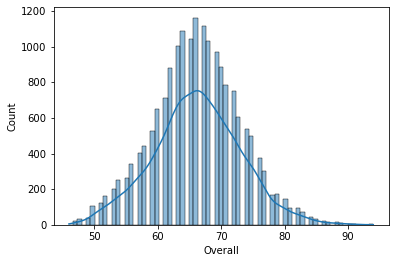

In [145]:
df['Overall'].skew()
sns.histplot(x='Overall',data=df,kde=True)

<AxesSubplot:xlabel='Overall'>

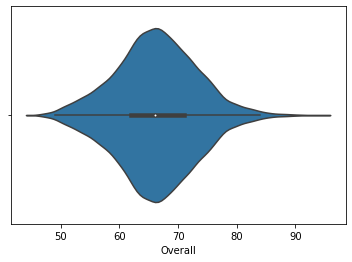

In [146]:
sns.violinplot(x='Overall',data=df)

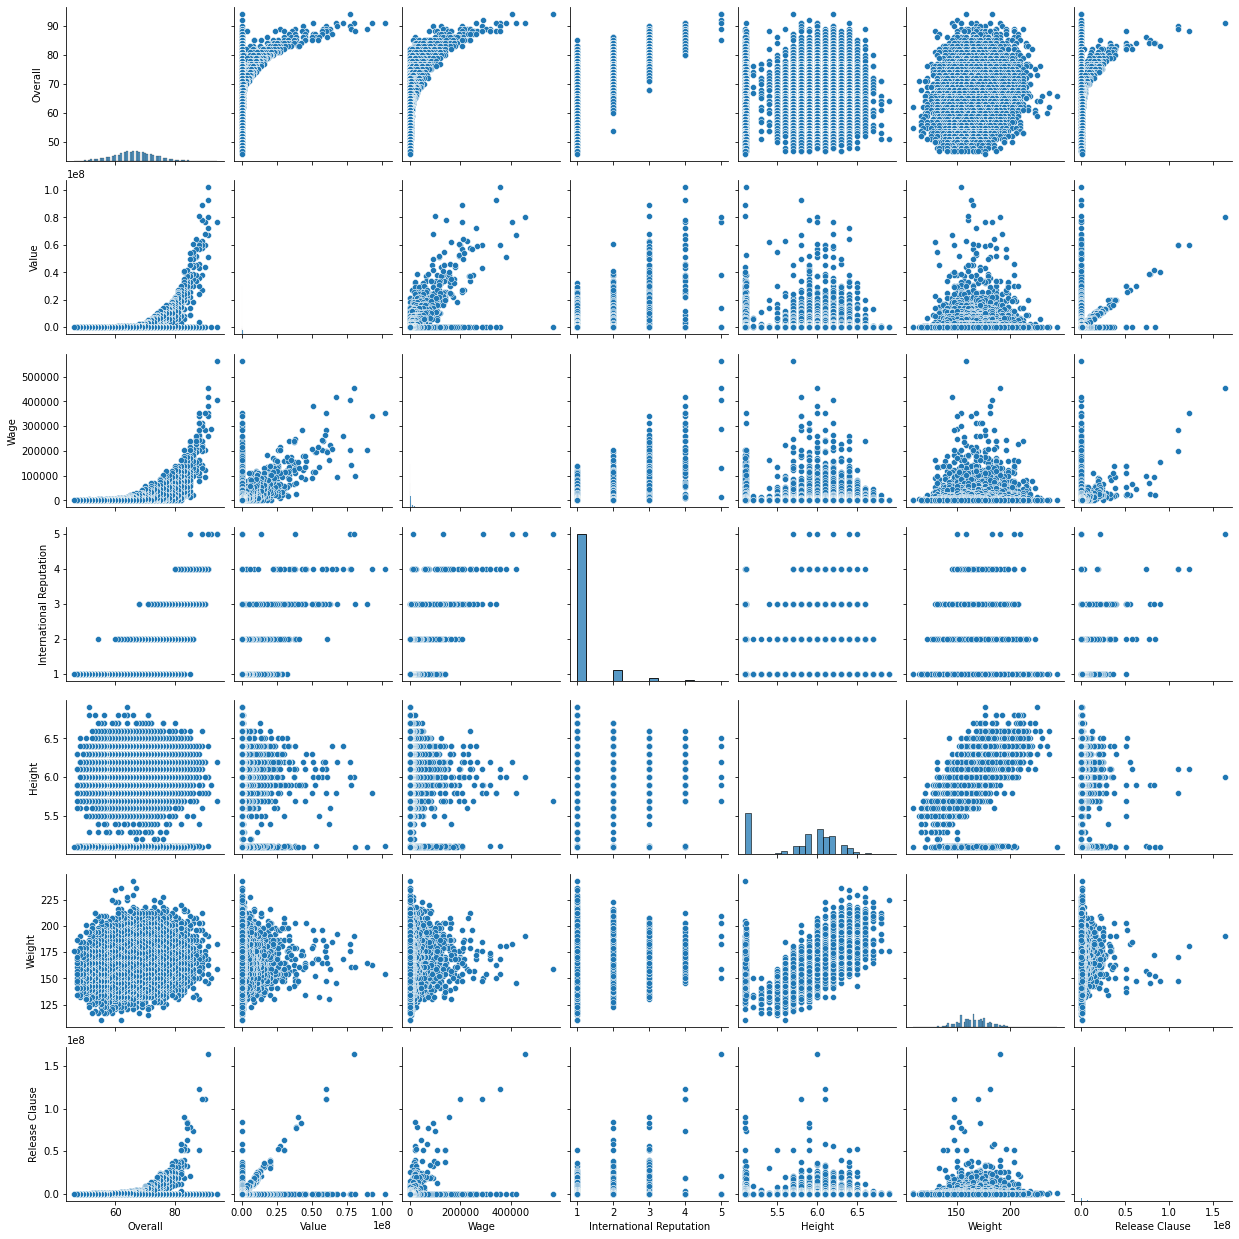

In [147]:
sns.pairplot(vars=['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause'],data=df)

#### 3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [152]:
df3=df[df['Contract Valid Until']==2020].sort_values(by='Overall',ascending=False).head(20)

In [153]:
df3

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_Year
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,2011.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4,2012.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6,2005.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1,2012.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2010.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,2013.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44.6,2005.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73.5,205000.0,Right,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141.5,2013.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44.4,2012.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76.5,2013.0


##### a) What would the average wage for this set of players be?

In [155]:
round(df3['Wage'].mean(),2)

205450.0

#### b. What is the average age?

In [156]:
round(df3['Age'].mean(),2)

30.65

#### c)Is there a correlation between the Overall rating and Value for these players

Correlation :  0.3947582177155544
Positively moderate Correlation


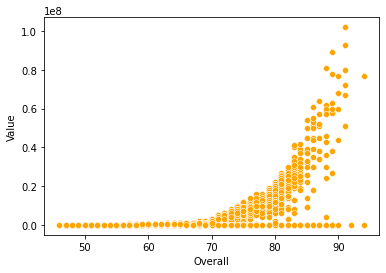

In [162]:
sns.scatterplot(x='Overall',y='Value',data=df,color='orange')
print('Correlation : ',df['Value'].corr(df['Overall']))
print('Positively moderate Correlation')

#### 4.Generate tables containing the top 5 players by Overall rating for each unique position.

In [168]:
dfx=df.groupby('Position').head(5).sort_values(by=['Position','Overall'],ascending=[True,False])
dfx1=dfx[['Name','Position','Overall']]
dfx1

,Name,Position,Overall
17,A. Griezmann,CAM,89
31,C. Eriksen,CAM,88
61,Roberto Firmino,CAM,86
66,T. Müller,CAM,86
74,M. Özil,CAM,86
...,...,...,...
5018,R. Raldes,NaN,70
6736,J. Arce,NaN,68
7922,L. Gutiérrez,NaN,67
9905,R. Vargas,NaN,66


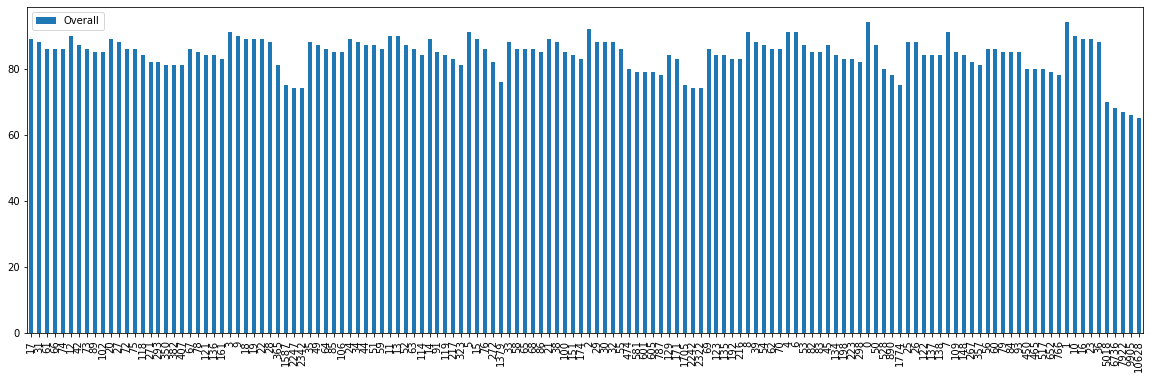

In [172]:
dfx1.plot(kind='bar',figsize=(20,6))
plt.show()

In [174]:
print('There are',dfx[['Name','Position','Overall']].duplicated().sum(),'players appearing in more than a Table')

There are 0 players appearing in more than a Table


#### b)What is the average wage one can expect to pay for the top 5 in every position



In [ ]:
dfx.groupby(by='Position').mean()['Wage'].sort_values(ascending=False)